<a href="https://colab.research.google.com/github/kanakkhaitan/decision-tree-and-random-forest/blob/main/3rd_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.version()

'0.1.22'

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)
train_csv = data_dir + '/weatherAUS.csv'

In [ ]:
!pip install pandas
import pandas as pd
raw_df = pd.read_csv(train_csv)
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=['RainTomorrow','RainToday'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install jovian
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
!pip install scikit-learn --upgrade --quiet
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


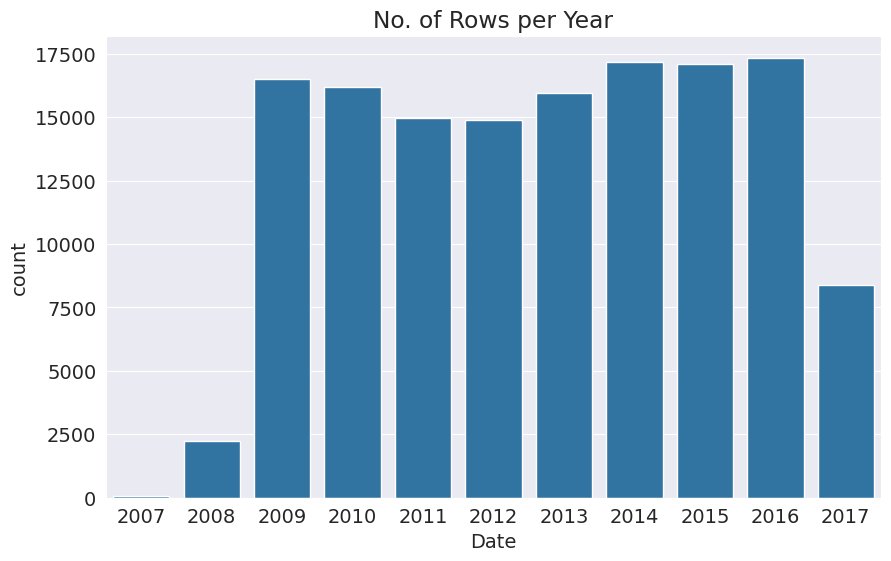

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]


In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [ ]:
input_cols=train_df.columns[1:-1]
target_col='RainTomorrow'

In [ ]:
input_cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_col]
val_inputs=val_df[input_cols]
val_targets=val_df[target_col]
test_inputs=test_df[input_cols]
test_targets=test_df[target_col]

In [ ]:
!pip install numpy
import numpy as np

In [ ]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
raw_df[numeric_cols].isna().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,314
MaxTemp,187
Rainfall,0
Evaporation,36331
Sunshine,40046
WindGustSpeed,6828
WindSpeed9am,874
WindSpeed3pm,1069
Humidity9am,1052
Humidity3pm,1116


In [ ]:
imputer.fit(raw_df[numeric_cols])
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


<ipython-input-31-235b1c3d6213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
<ipython-input-31-235b1c3d6213>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
<ipython-input-31-235b1c3d6213>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
print('Minimum')
list(scaler.data_min_)

Minimum


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [ ]:
print('Maximum')
list(scaler.data_max_)

Maximum


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])


<ipython-input-37-42db340e78fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
<ipython-input-37-42db340e78fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
<ipython-input-37-42db340e78fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-42-8950d7c1751d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-42-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-42-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [ ]:
train_inputs[encoded_cols]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_preds=model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

<ipython-input-47-5a0b2543de7a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76192
Yes,21796


In [ ]:
train_probs=model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_targets,train_preds)

0.9999795893374699

In [ ]:
model.score(X_val,val_targets)

0.7936684416876353

In [ ]:
val_targets.value_counts()/len(val_targets)

,count
RainTomorrow,
No,0.790626
Yes,0.209374


In [ ]:
from sklearn.tree import plot_tree,export_text


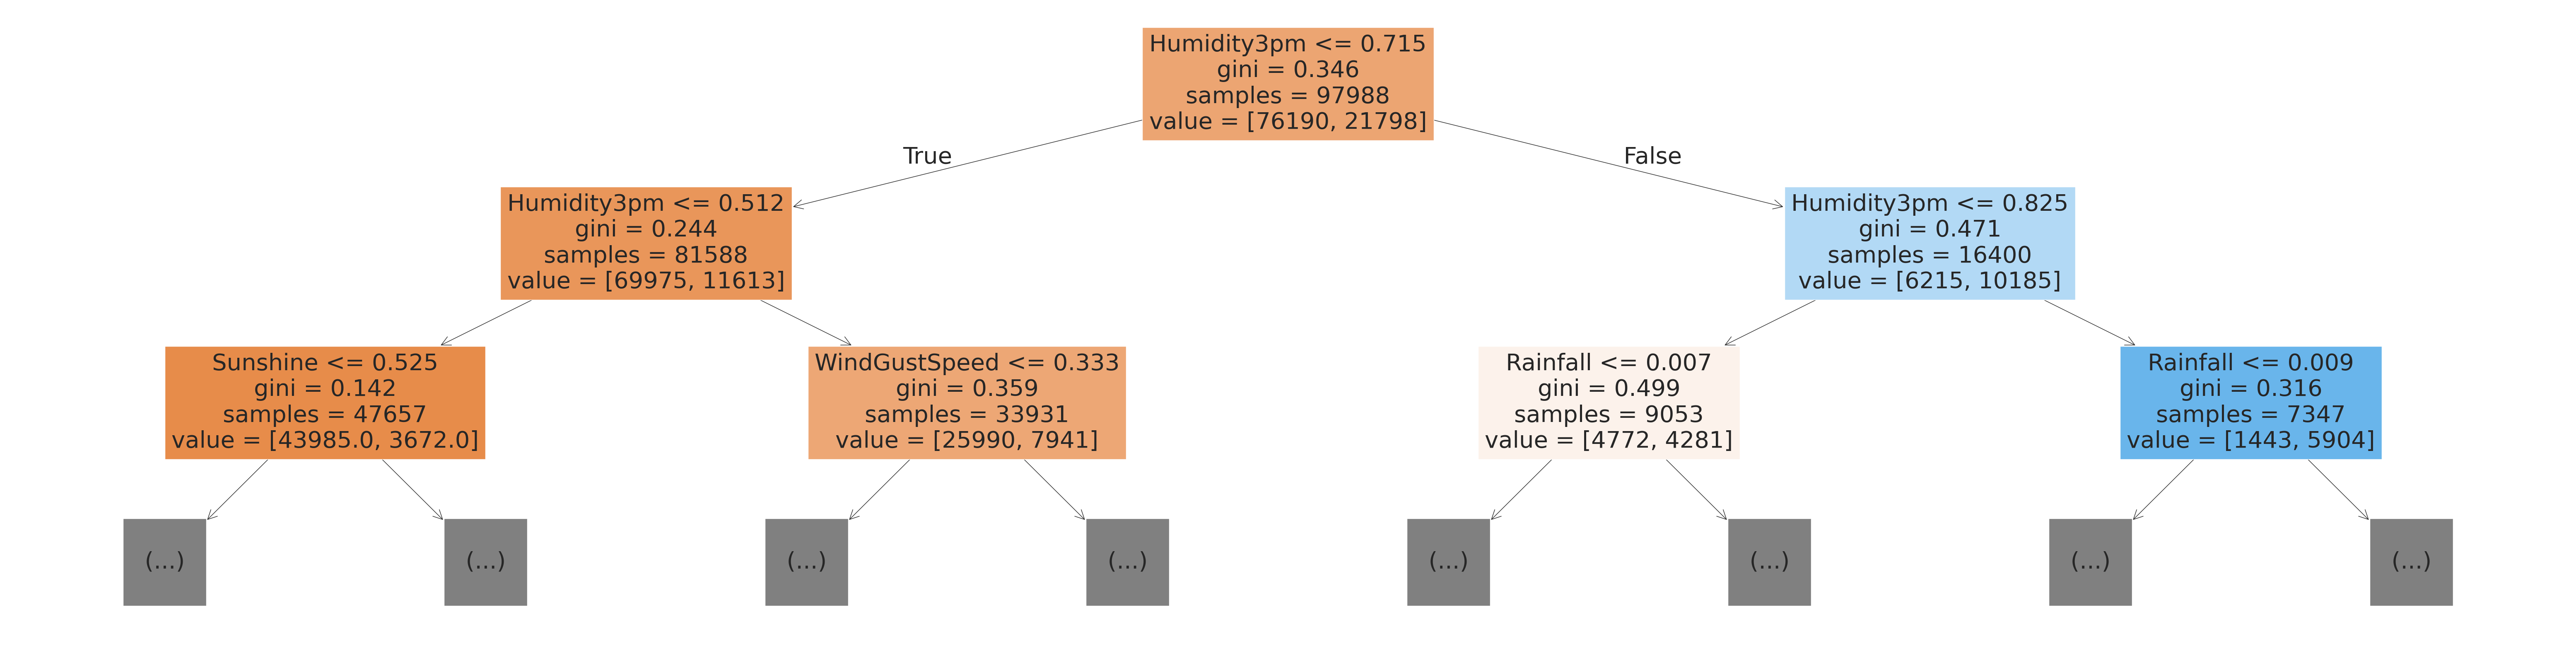

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

49

In [ ]:
tree_text=export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [ ]:
model.feature_importances_

array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
       4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
       3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
       1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
       2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
       1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
       8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
       1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
       1.45258514e-04, 1.50514431e-03, 1.07182434e-03, 1.44829853e-03,
       9.12938347e-04, 8.15936194e-04, 1.26468932e-03, 1.49092396e-03,
       6.60526489e-04, 7.09652768e-04, 1.02344514e-03, 1.54844869e-03,
       1.31824900e-03, 6.07286685e-04, 5.04774518e-04, 1.50976724e-03,
       1.36782184e-03, 2.12844007e-03, 1.24769141e-03, 1.92047622e-03,
       1.46145581e-03, 2.12670031e-03, 1.36401119e-03, 4.10431985e-04,
      

In [ ]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

importance_df.head(10)

,feature,importance
9,Humidity3pm,0.278697
11,Pressure3pm,0.062246
5,WindGustSpeed,0.060216
4,Sunshine,0.047403
2,Rainfall,0.044681
10,Pressure9am,0.037475
8,Humidity9am,0.037272
0,MinTemp,0.037235
14,Temp9am,0.035200
15,Temp3pm,0.032817


<Axes: title={'center': 'Feature Importrance'}, xlabel='importance', ylabel='feature'>

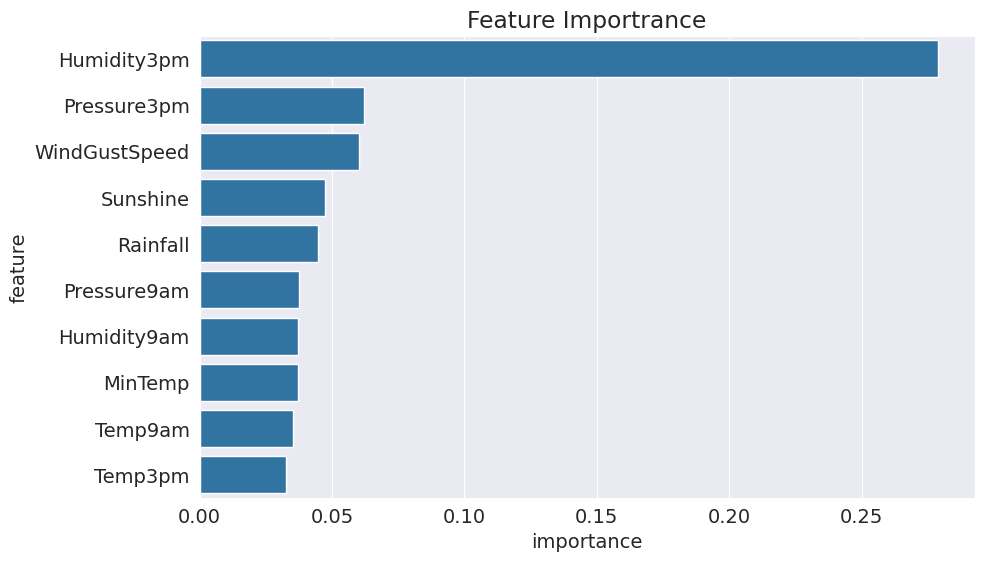

In [ ]:
plt.title('Feature Importrance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

In [ ]:
model=DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.score(X_train,train_targets)

0.8315916234640977

In [ ]:
model.score(X_val,val_targets)

0.8348060155655685

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]\nclass = No'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.335\nsamples = 6010\nvalue = [4731, 1279]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.108\nsamples = 41647\nvalue = [39254, 2393]\nclass = No'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.304\nsamples = 27841\nvalue = [22637, 5204]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 6090\nvalue = [3353, 2737]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainf

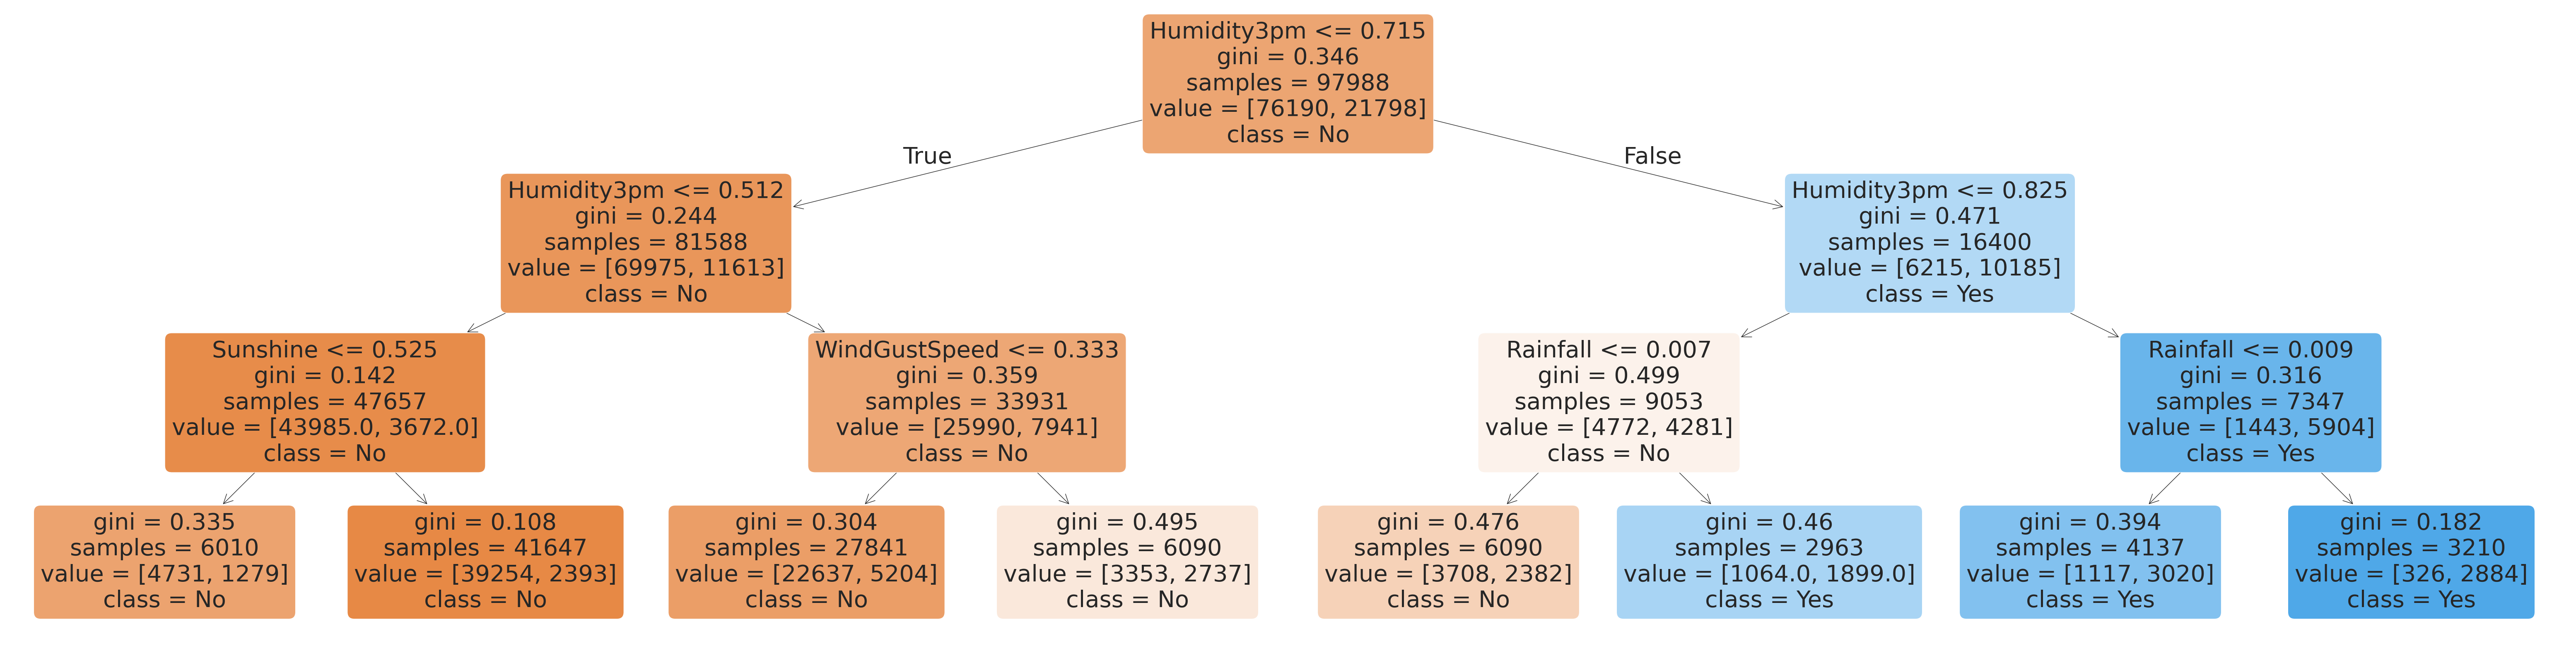

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,filled=True,rounded=True,feature_names=X_train.columns,class_names=model.classes_)

In [ ]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.53
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [ ]:
def max_depth_error(md):
  model=DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_error=1-model.score(X_train,train_targets)
  val_error=1-model.score(X_val,val_targets)
  return {'max depth':md,'Training error':train_error,'Validation error':val_error}


In [ ]:
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])
errors_df

,max depth,Training error,Validation error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


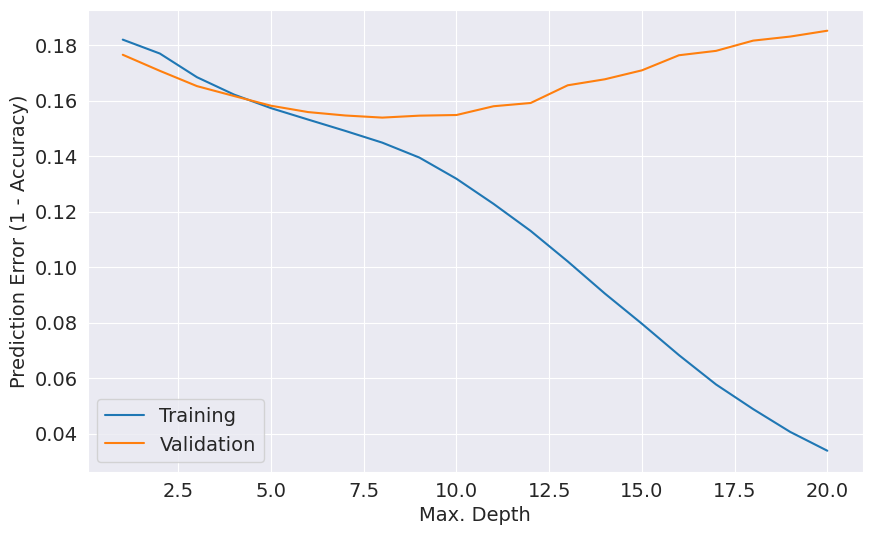

In [ ]:
plt.figure()
plt.plot(errors_df['max depth'], errors_df['Training error'])
plt.plot(errors_df['max depth'], errors_df['Validation error'])
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])



In [ ]:
model=DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.8509409315426378, 0.8453976242027035)

In [ ]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)
model.fit(X_train,train_targets)



DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.852696248520227

In [ ]:
model.score(X_val,val_targets)

0.8471531394464276

In [ ]:
model.tree_.max_depth

11

In [ ]:
model_text=export_text(model,feature_names=list(X_train.columns))
model_text[:3000]

'|--- Humidity3pm <= 0.72\n|   |--- Humidity3pm <= 0.51\n|   |   |--- Sunshine <= 0.53\n|   |   |   |--- Pressure3pm <= 0.58\n|   |   |   |   |--- Pressure3pm <= 0.44\n|   |   |   |   |   |--- Humidity3pm <= 0.24\n|   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- Humidity3pm >  0.24\n|   |   |   |   |   |   |--- Sunshine <= 0.37\n|   |   |   |   |   |   |   |--- class: Yes\n|   |   |   |   |   |   |--- Sunshine >  0.37\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |--- Pressure3pm >  0.44\n|   |   |   |   |   |--- Humidity3pm <= 0.28\n|   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- Humidity3pm >  0.28\n|   |   |   |   |   |   |--- Cloud3pm <= 0.39\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |   |--- Cloud3pm >  0.39\n|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50\n|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23\n|   |   |   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |   |   |   |--

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.9999693840062048

In [ ]:
model.score(X_val,val_targets)

0.8567499561121189

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.96, 0.04],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.94, 0.06]])

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
len(model.estimators_)

100

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.344\nsamples = 61960\nvalue = [76344, 21644]\nclass = No'),
 Text(0.25, 0.625, 'Location_Cairns <= 0.5\ngini = 0.499\nsamples = 11206\nvalue = [9273, 8335]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Rainfall <= 0.007\ngini = 0.498\nsamples = 10799\nvalue = [9032, 7934]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir9am_nan <= 0.5\ngini = 0.469\nsamples = 407\nvalue = [241, 401]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.276\nsamples = 50754\nvalue = [67071, 13309]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Humidity9am <= 0.675\ngini = 0.203\nsamples = 41293\nvalue = [57901, 7511]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Temp3pm <= 0.383\ngini = 0.47

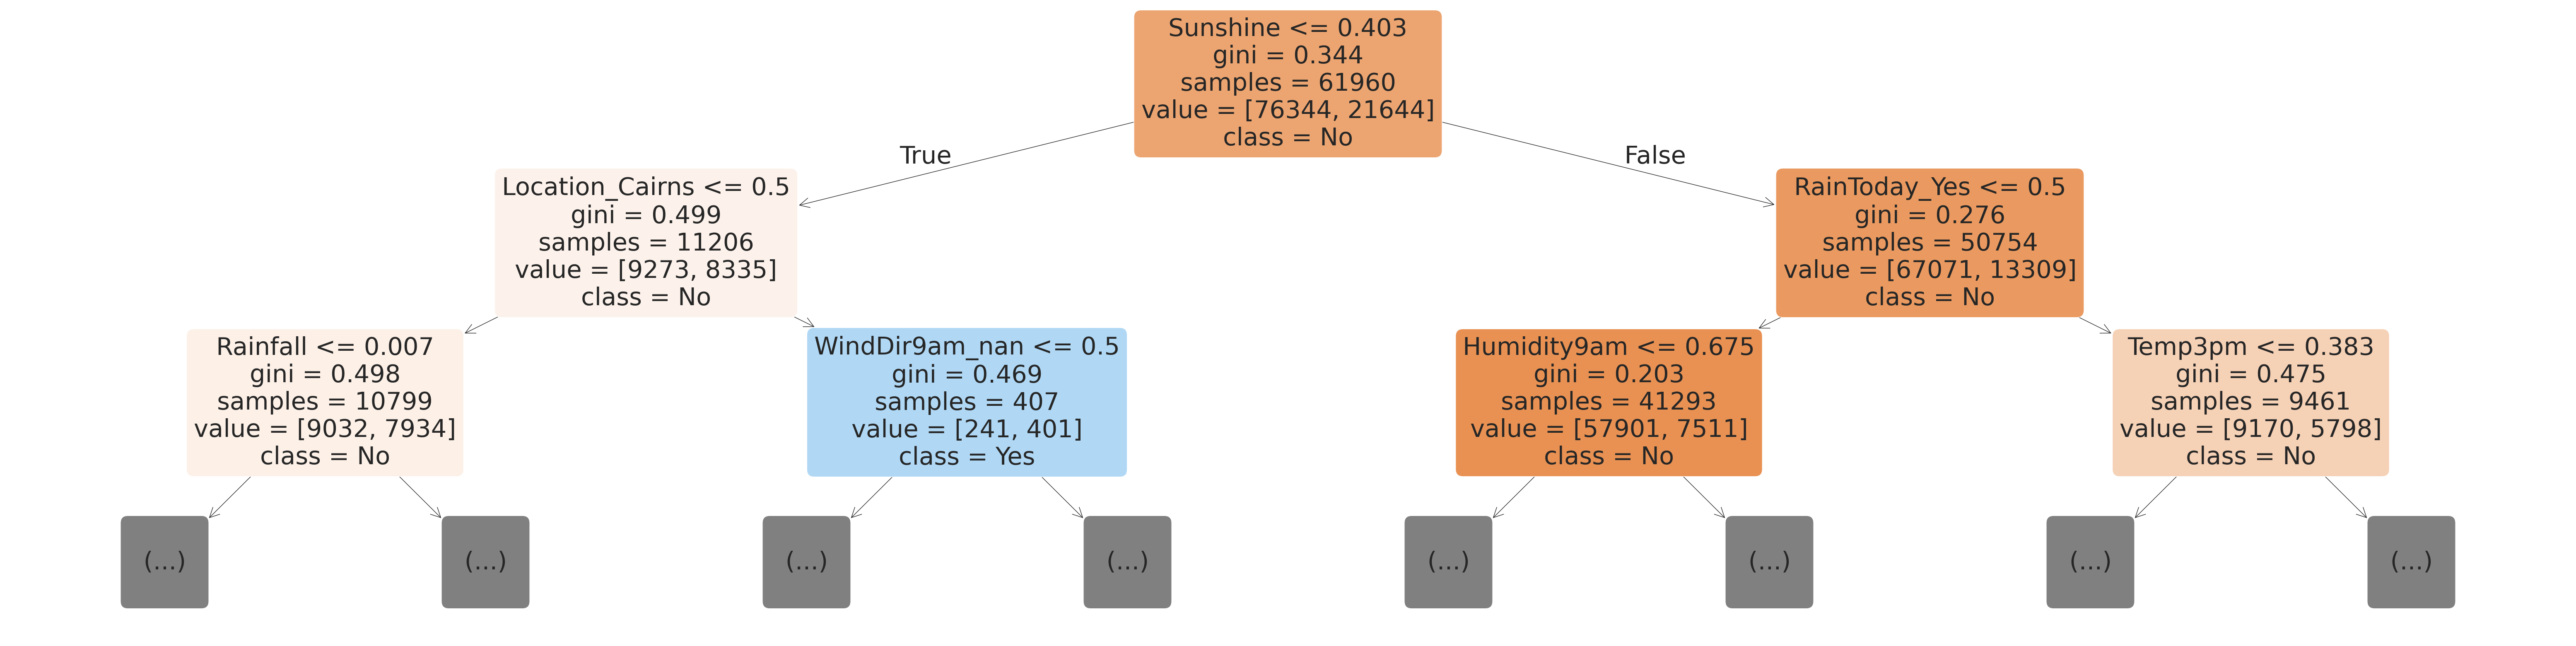

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,filled=True,rounded=True,feature_names=X_train.columns,class_names=model.classes_)

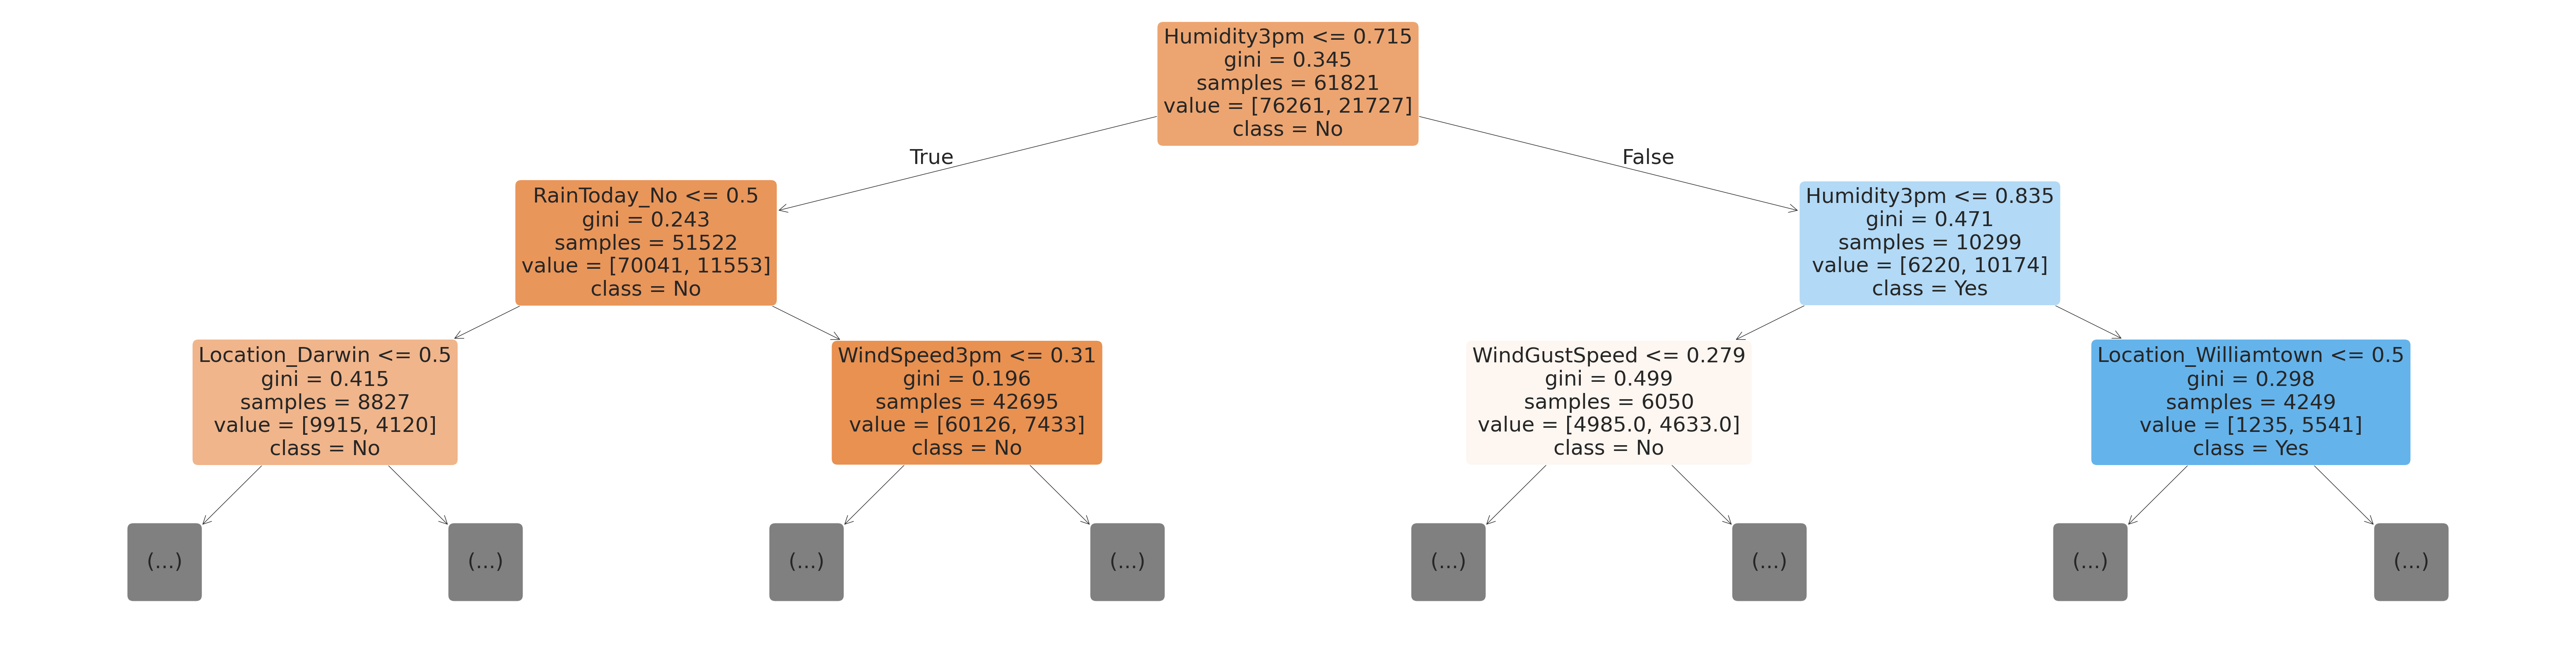

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);


In [ ]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.129273
4,Sunshine,0.059835
11,Pressure3pm,0.053178
8,Humidity9am,0.051036
10,Pressure9am,0.049215
5,WindGustSpeed,0.047183
2,Rainfall,0.046710
15,Temp3pm,0.046196
1,MaxTemp,0.042871
0,MinTemp,0.042163


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

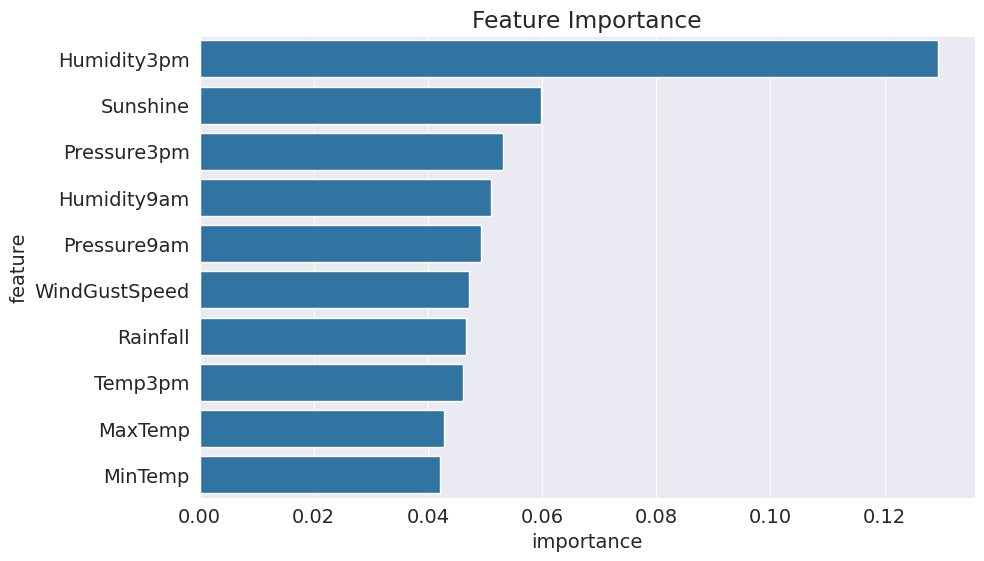

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [ ]:
base_model=RandomForestClassifier(n_jobs=-1,random_state=42).fit(X_train,train_targets)
base_train_acc=base_model.score(X_train,train_targets)
base_val_acc=base_model.score(X_val,val_targets)

In [ ]:
base_accs=base_train_acc,base_val_acc
base_accs

(0.9999693840062048, 0.8567499561121189)

In [ ]:
model=RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42)
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)


(0.9869882026370576, 0.8447539352800046)

In [ ]:
model=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999795893374699, 0.8575106793843993)

In [ ]:
def test_params(**params):
  model=RandomForestClassifier(n_jobs=-1,random_state=42,**params).fit(X_train,train_targets)
  return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [ ]:
test_params(max_depth=5)

(0.8219067640935624, 0.8261454736965299)

In [ ]:
test_params(max_depth=5,max_leaf_nodes=1024,n_estimators=10)

(0.8187737273951913, 0.823161097782199)

In [ ]:
test_params(max_features='log2')

(0.9999795893374699, 0.8565158874129557)

In [ ]:
test_params(max_features=3)

(0.9999795893374699, 0.8551114752179765)

In [ ]:
test_params(max_features=6)

(0.9999795893374699, 0.8565158874129557)

In [ ]:
base_accs

(0.9999693840062048, 0.8567499561121189)

In [ ]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9570763766991877, 0.8553455439171397)

In [ ]:
test_params(min_samples_split=100,min_samples_leaf=60)

(0.8516655100624566, 0.8458657616010299)

In [ ]:
test_params(min_impurity_decrease=1e-2)

(0.7775441890843777, 0.7906255485985136)

In [ ]:
test_params(min_impurity_decrease=1e-6)

(0.9887435196146467, 0.8569255076364913)

In [ ]:
test_params(bootstrap=False)

(0.9999795893374699, 0.8579202996079349)

In [ ]:
test_params(max_samples=.9)

(0.9998469200310242, 0.8571595763356545)

In [ ]:
train_targets.value_counts()/len(train_targets)

,count
RainTomorrow,
No,0.777544
Yes,0.222456


In [ ]:
test_params(class_weight='balanced')

(0.9999795893374699, 0.8558721984902569)

In [ ]:
test_params(class_weight={'No':1,'Yes':3})

(0.9999693840062048, 0.8546433378196501)

In [ ]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features=7,
                               max_depth=30,
                               class_weight={'No': 1, 'Yes': 1.5})

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

0.9924072335388007